## Preparing the work

### Loading libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb 
import pandas as pd

### Importing data

In [3]:
df = pd.read_csv("D:\Myy Documents\[DS] All about Python\Online retail ii dataset from ML repository\Year 2010-2011.csv")
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom
9,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom


In [4]:
# Understand the data better
df.shape
display(df.shape)
df.info()

(541910, 8)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541910 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      541910 non-null  object 
 1   StockCode    541910 non-null  object 
 2   Description  540456 non-null  object 
 3   Quantity     541910 non-null  int64  
 4   InvoiceDate  541910 non-null  object 
 5   Price        541910 non-null  float64
 6   Customer ID  406830 non-null  float64
 7   Country      541910 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Cleaning up the data 

#### Missing values?

In [31]:
# Find missing values:
na_df = df[df.isna().any(axis=1)]
display(na_df.head(10))
print(df.isnull().sum())

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth,Hour
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,12/1/2010 14:32,2.51,NaN,United Kingdom,2010,12,2.51,2010 12,14
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,12/1/2010 14:32,2.51,NaN,United Kingdom,2010,12,5.02,2010 12,14
1445,536544,21786,POLKADOT RAIN HAT,4,12/1/2010 14:32,0.85,NaN,United Kingdom,2010,12,3.40,2010 12,14
1446,536544,21787,RAIN PONCHO RETROSPOT,2,12/1/2010 14:32,1.66,NaN,United Kingdom,2010,12,3.32,2010 12,14
1447,536544,21790,VINTAGE SNAP CARDS,9,12/1/2010 14:32,1.66,NaN,United Kingdom,2010,12,14.94,2010 12,14
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,12/1/2010 14:32,2.51,NaN,United Kingdom,2010,12,5.02,2010 12,14
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,12/1/2010 14:32,0.43,NaN,United Kingdom,2010,12,4.30,2010 12,14
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,12/1/2010 14:32,0.43,NaN,United Kingdom,2010,12,3.87,2010 12,14
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,12/1/2010 14:32,0.43,NaN,United Kingdom,2010,12,4.73,2010 12,14
1452,536544,21809,CHRISTMAS HANGING TREE WITH BELL,1,12/1/2010 14:32,2.51,NaN,United Kingdom,2010,12,2.51,2010 12,14


Invoice             0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
Price               0
Customer ID    132220
Country             0
Year                0
Month               0
Sales               0
YearMonth           0
Hour                0
dtype: int64


Since the missing values are plenty and in the Des and ID column, we may not need to drop those rows as long as we don't do calc on individual level.

#### Drop canceled order


In [23]:
df['Success'] = df['Invoice'].apply(lambda x: 'C' not in str(x))
df = df[df['Success']==True]
df = df.drop('Success',axis=1)

#### Keep meaningful transactions

In [25]:
df = df[df['Quantity'] > 0]

#### Delete orders on debt

In [26]:
df = df[df['Price'] > 0]

### Exploratory data analysis

In [6]:
#### Which is the best month of sales
#### The hour with most traffic
#### Stats by Country
#### RFM

#### Which is the best month of sales

##### Add a column for Year, since there are two years in this dts

In [27]:
df['Year'] = pd.to_datetime(df['InvoiceDate']).dt.year
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12,15.30,2010 12,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12,22.00,2010 12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8


##### Add a column for month

In [28]:
# The approach seems to take up computer power
df['Month'] = pd.to_datetime(df['InvoiceDate']).dt.month
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12,15.30,2010 12,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12,22.00,2010 12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8


##### Add Sales column

In [29]:
df['Sales'] = df['Quantity'] * df['Price'].astype('float')
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12,15.30,2010 12,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12,22.00,2010 12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom,2010,12,15.30,2010 12,8
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom,2010,12,25.50,2010 12,8
7,536366,22633,HAND WARMER UNION JACK,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010,12,11.10,2010 12,8
8,536366,22632,HAND WARMER RED POLKA DOT,6,12/1/2010 8:28,1.85,17850.0,United Kingdom,2010,12,11.10,2010 12,8
9,536368,22960,JAM MAKING SET WITH JARS,6,12/1/2010 8:34,4.25,13047.0,United Kingdom,2010,12,25.50,2010 12,8


In [10]:
# Doesn't work: df.groupby(['Year'],['Month']).sum()

In [11]:
# Create another column for Year and Month
display(df['Year'].dtype)
display(df['Month'].dtype)

dtype('int64')

dtype('int64')

In [12]:
df['YearMonth'] = df['Year'].astype(str) + " " + df['Month'].astype(str)
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12,15.30,2010 12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12,22.00,2010 12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12


In [13]:
YearMonth = df['YearMonth'].unique().tolist()
YearMonth

['2010 12',
 '2011 1',
 '2011 2',
 '2011 3',
 '2011 4',
 '2011 5',
 '2011 6',
 '2011 7',
 '2011 8',
 '2011 9',
 '2011 10',
 '2011 11',
 '2011 12']

In [14]:
MonthlySales = df.groupby(['YearMonth']).sum()['Sales']
MonthlySales

YearMonth
2010 12     748957.020
2011 1      560000.260
2011 10    1070704.670
2011 11    1461756.250
2011 12     433686.010
2011 2      498062.650
2011 3      683267.080
2011 4      493207.121
2011 5      723333.510
2011 6      691123.120
2011 7      681300.111
2011 8      682680.510
2011 9     1019687.622
Name: Sales, dtype: float64

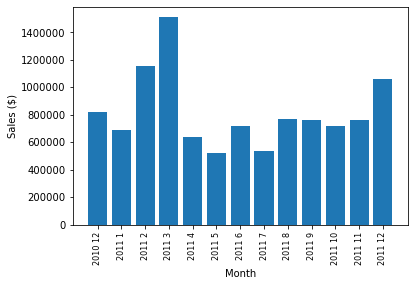

In [30]:
# Plot the result

plt.bar(YearMonth, df.groupby(['YearMonth']).sum()['Sales'])
plt.xticks(YearMonth, rotation='vertical', size=8)
plt.ticklabel_format(useOffset=False, style='plain', axis = 'y') # to present Sales in normal scientific notation
# This method only works with Scalarformatter --> we will have to specify its application for the y axis otherwise
# we will run into error since the x axis's values are str
plt.ylabel('Sales ($)')
plt.xlabel('Month')
plt.show()

#### Peak hour for transactions

##### Add column Hour

In [16]:
df['Hour'] = pd.to_datetime(df['InvoiceDate']).dt.hour
df.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Year,Month,Sales,YearMonth,Hour
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12,15.30,2010 12,8
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12,22.00,2010 12,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12,20.34,2010 12,8


In [17]:
hour = df.Hour.unique().tolist()
hour

[8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 7, 18, 19, 20, 6]

In [18]:
Hourlysales = df.groupby(['Hour']).sum()
Hourlysales

,Quantity,Price,Customer ID,Year,Month,Sales
Hour,,,,,,
6,-86,440.660,6.251860e+05,82451,328,-497.350
7,15361,1546.310,5.462635e+06,770203,2598,31009.320
8,158163,29930.330,1.300868e+08,17915787,64503,281840.860
9,429366,188947.671,3.334411e+08,69038912,251862,766734.051
10,684416,212692.181,5.909521e+08,98609997,362327,1329056.521
11,637672,268246.250,7.708067e+08,115977229,427164,1147437.920
12,823936,313921.320,1.125383e+09,158280735,599201,1362502.290
13,676803,295842.720,9.967588e+08,145307422,541118,1177506.370
14,571549,279164.021,8.452458e+08,135676653,521150,1095212.901


Transactions only took place between 6 am and 8 pm.

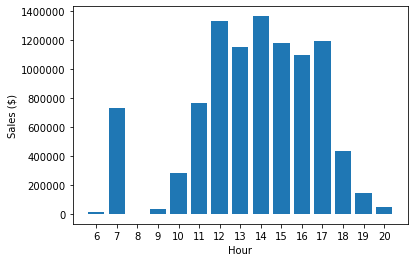

In [19]:
# Plot


plt.bar(hour, Hourlysales['Sales'])
plt.xticks(hour)
plt.ticklabel_format(useOffset=False, style='plain', axis = 'y')
plt.ylabel('Sales ($)')
plt.xlabel('Hour')
plt.show()

#### Stats for each country:

In [20]:
display (df.Country.unique())
df.Country.nunique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

38

There are 38 countries in the dts

In [21]:
# Sales for each country
c_sales = df.groupby(['Country']).sum()
c_sales.Sales.head()

Country
Australia    137077.27
Austria       10154.32
Bahrain         548.40
Belgium       40910.96
Brazil         1143.60
Name: Sales, dtype: float64

In [22]:
# Top 10
c_sales.sort_values('Sales', ascending=False).head(10)
c_sales_top10 = c_sales.sort_values('Sales', ascending=False).head(10)
c_sales_top10.Sales

Country
United Kingdom    8.187806e+06
Netherlands       2.846615e+05
EIRE              2.632768e+05
Germany           2.216982e+05
France            1.974219e+05
Australia         1.370773e+05
Switzerland       5.638535e+04
Spain             5.477458e+04
Belgium           4.091096e+04
Sweden            3.659591e+04
Name: Sales, dtype: float64